# 1. Install and Import Dependencies

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.11.0)
ERROR: No matching distribution found for torch==1.8.1+cu111


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt

  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached tensorboard-2.9.0-py3-none-any.whl (5.8 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.7-py3-none-any.whl (97 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth-2.6.6-py2.py3-none-any.whl (156 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached We

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\teo28/.cache\torch\hub\master.zip
YOLOv5  2022-5-23 Python-3.10.4 torch-1.11.0+cpu CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [50]:
img = 'https://www.protegez-vous.ca/var/protegez_vous/storage/images/_aliases/blog_thumb_1024x620/8/6/5/7/2967568-3-fre-CA/objets-stephanie-perron.jpg'

In [56]:
img = '2018-05-15 12.05.13.jpg'

In [57]:
results = model(img)
results.print()

image 1/1: 3264x2448 1 banana
Speed: 94.0ms pre-process, 108.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 480)


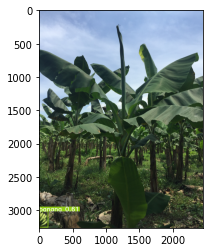

In [58]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [61]:
results.render()

[array([[[147, 169, 210],
         [147, 169, 210],
         [146, 168, 209],
         ...,
         [164, 192, 231],
         [163, 191, 230],
         [162, 190, 229]],
 
        [[143, 165, 206],
         [144, 166, 207],
         [144, 166, 207],
         ...,
         [164, 192, 231],
         [162, 190, 229],
         [162, 190, 229]],
 
        [[145, 167, 208],
         [146, 168, 209],
         [146, 168, 209],
         ...,
         [163, 191, 230],
         [162, 190, 229],
         [162, 190, 229]],
 
        ...,
 
        [[ 20,  21,  15],
         [ 21,  22,  16],
         [ 23,  26,  19],
         ...,
         [ 57,  70,  27],
         [ 57,  72,  29],
         [ 61,  76,  33]],
 
        [[ 26,  27,  22],
         [ 25,  26,  21],
         [ 27,  30,  23],
         ...,
         [ 57,  70,  27],
         [ 57,  73,  28],
         [ 61,  77,  32]],
 
        [[ 28,  29,  24],
         [ 25,  26,  21],
         [ 27,  30,  23],
         ...,
         [ 62,  75,  32],
  

In [60]:
results.show()

# 4. Real Time Detections

In [62]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [2]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

# 6. Load Custom Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\User/.cache\torch\hub\master.zip
YOLOv5  2021-7-11 torch 1.8.1+cu111 CUDA:0 (GeForce RTX 2070 SUPER, 8192.0MB)

Fusing layers... 
Model Summary: 224 layers, 7097062 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [11]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [12]:
results = model(img)

In [13]:
results.print()

image 1/1: 480x640 1 awake
Speed: 16.0ms pre-process, 11.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


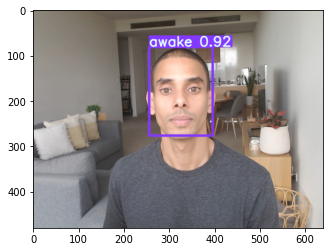

In [14]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()